In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Utilizei o pacote LerMicrodados para baixar as informações de 2015 e salvar em csv para analisar aqui. O download está disponível aqui >>>
https://github.com/otavio-s-s/lerMicrodados

In [2]:
#pip install lerMicrodados

In [3]:
#from lerMicrodados import lerMicrodados

#lerMicrodados.ler_PNAD('Dados_20170517.zip', ano = 2015, header=True)

Precisei rodar o lerMicrodados uma única vez para salvar em csv, depois disso não foi mais necessário. Depois, só acessei o local do arquivo csv salvo, exibido abaixo.

In [4]:
pes = pd.read_csv("C:\\Users\\Germana\\Documents\\vscode\\pnad\\PES2015.csv", sep=',')
pes

,V0101,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,V0401,...,V3628,V3629,V3630,V3631,V3632,V3633,V3634,V3637,V3638,V9993
0,2015,11000015,1,1,2,27,2,1992,23,1,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,333.0,634.0,20170511
1,2015,11000015,3,1,4,4,5,1992,23,1,...,2.0,NaN,2.0,NaN,1.0,NaN,2.0,333.0,470.0,20170511
2,2015,11000015,4,1,4,4,1,1980,35,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
3,2015,11000015,4,2,2,5,6,1981,34,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
4,2015,11000015,4,3,4,8,4,2004,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356899,2015,53002148,17,1,2,21,12,1976,38,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
356900,2015,53002148,17,2,4,31,7,1976,39,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
356901,2015,53002148,17,3,4,9,11,1997,17,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511
356902,2015,53002148,17,4,4,18,6,2000,15,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20170511


In [5]:
pes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356904 entries, 0 to 356903
Data columns (total 434 columns):
 #    Column   Dtype  
---   ------   -----  
 0    V0101    int64  
 1    V0102    int64  
 2    V0103    int64  
 3    V0301    int64  
 4    V0302    int64  
 5    V3031    int64  
 6    V3032    int64  
 7    V3033    int64  
 8    V8005    int64  
 9    V0401    int64  
 10   V0402    int64  
 11   V0403    int64  
 12   V0404    int64  
 13   V0405    int64  
 14   V0406    float64
 15   V0407    float64
 16   V0408    int64  
 17   V4111    float64
 18   V4112    float64
 19   V4011    float64
 20   V0412    int64  
 21   V0501    int64  
 22   V0502    float64
 23   V5030    float64
 24   V0504    float64
 25   V0505    float64
 26   V5061    float64
 27   V5062    float64
 28   V5063    float64
 29   V5064    float64
 30   V5065    float64
 31   V0507    float64
 32   V5080    float64
 33   V5090    float64
 34   V0510    float64
 35   V0511    float64
 36   V5121   

Como vocês podem ver, é um arquivo enoorme com muitas variáveis (colunas). O objetivo da análise exploratória aqui é ver as informações relativas a emprego, gênero e renda. Dessa maneira, irei reduzir um pouco esse meu "universo" para analisar só aquilo que desejo no momento.


Para saber quais variáveis me interessam, preciso consultar o dicionário do microdado. O IBGE disponibiliza para download, assim como também disponibiliza o questionário, caso você queira entender o contexto da resposta. 

Aqui embaixo temos a estrutura do dicionário. Quando transformamos em csv, a leitura fica muito mais fácil porque as variáveis viram diretamente as nossas colunas. Quando baixamos o microdado do IBGE, ele vem em fixed width files — FWF — ou arquivos de largura fixa, meio confuso de ler, mas que o numero separado por virgula em sequencia indica um atributo do dado. É uma loucura, mas tá valendo.

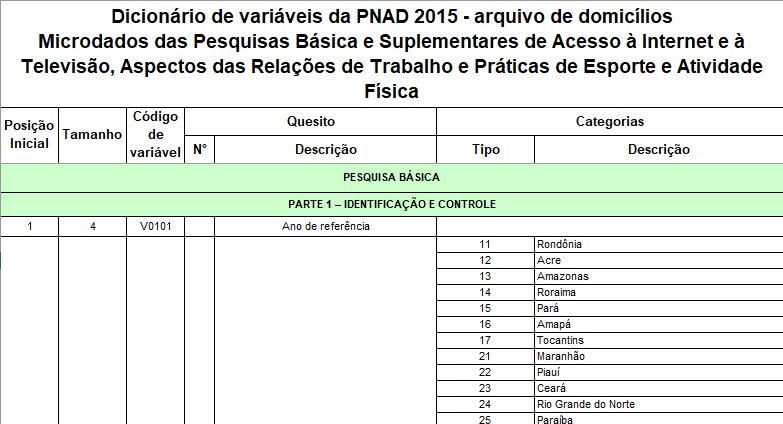


In [6]:
pes_limited = pes.filter(items=['V0102','V0302','V0401','V0404','V0601','V6007','V06111','V061113','V9001','V4743'])
pes_limited

,V0102,V0302,V0401,V0404,V0601,V6007,V06111,V061113,V9001,V4743
0,11000015,2,1,8,1,5.0,1.0,1.0,1.0,4.0
1,11000015,4,1,2,1,5.0,1.0,1.0,1.0,4.0
2,11000015,4,1,8,1,NaN,1.0,1.0,1.0,4.0
3,11000015,2,2,8,1,8.0,1.0,1.0,1.0,4.0
4,11000015,4,3,8,1,NaN,1.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...
356899,53002148,2,1,8,1,4.0,1.0,1.0,1.0,2.0
356900,53002148,4,2,8,1,4.0,1.0,1.0,3.0,2.0
356901,53002148,4,3,8,1,NaN,1.0,1.0,1.0,2.0
356902,53002148,4,3,8,1,NaN,1.0,1.0,3.0,2.0


Consultando o dicionário, selecionei as seguintes variáveis:

V0102 - Nº DE CONTROLE (OS DOIS PRIMEIROS NÚMEROS CORRESPONDEM AO UF) \\\
V0302 - SEXO \\\
V0401 - CONDIÇÃO NA UNIDADE FAMILIAR (MÃE, CONJUGE, PAI, FILHO E ETC) \\\
V0404 - COR OU RAÇA \\\
V0601 - SABE LER OU ESCREVER \\\
V6007 - ESCOLARIDADE \\\
V06111 - TEM ACESSO À INTERNET \\\
V061113 - TEM ACESSO À INTERNET PELO CELULAR \\\
V09001 - TRABALHOU NA SEMANA DE REFERÊNCIA \\\
V4743 - FAIXA DE RENDIMENTO MENSAL PER CAPITA

As variáveis V0701 E V0704 tinham muitos NaN, logo optei por desconsiderá-las e utilizar apenas a V9001 que apresentou algo em torno de 13% de NaN. Todas se referem à ocupação do entrevistado, sendo que:

PARTE 7 - TRABALHO DAS CRIANÇAS DE 5 A 9 ANOS DE IDADE

V0701 - Teve algum trabalho no período de referência de 365 dias

V0704 - Trabalhou na semana de referência

PARTE 9 – TRABALHO E RENDIMENTO DAS PESSOAS DE 10 ANOS OU MAIS DE IDADE

V9001 - Trabalhou na semana de referência

Não tinha me atentado de cara que a parte 07 diz respeito ao trabalho infantil. Infelizmente algumas trabalharam.



Agora, vou subdividir meu dataframe por gênero. Quero analisar individualmente as informações agregadas dessa forma. Dessa maneira, irei utilizar o método groupby e, dessa maneira, irei agrupar por sexo declarado.

In [7]:
pes_limited['V0302'].unique()

array([2, 4], dtype=int64)

In [8]:
fem = pes_limited.groupby('V0302').get_group(4)
fem.head(10)

,V0102,V0302,V0401,V0404,V0601,V6007,V06111,V061113,V9001,V4743
1,11000015,4,1,2,1,5.0,1.0,1.0,1.0,4.0
2,11000015,4,1,8,1,NaN,1.0,1.0,1.0,4.0
4,11000015,4,3,8,1,NaN,1.0,2.0,3.0,4.0
5,11000015,4,3,8,1,NaN,NaN,NaN,NaN,4.0
6,11000015,4,3,8,3,NaN,NaN,NaN,NaN,4.0
7,11000015,4,5,8,1,5.0,1.0,1.0,1.0,4.0
9,11000015,4,4,8,1,1.0,3.0,NaN,3.0,6.0
10,11000015,4,1,2,1,4.0,1.0,2.0,3.0,5.0
11,11000015,4,1,8,1,4.0,3.0,NaN,1.0,2.0
13,11000015,4,1,8,1,5.0,3.0,NaN,3.0,4.0


Ai em cima usei o método groupby + o get group para obter informações apenas dos entrevistados que responderam ser do sexo feminino na pesquisa. A partir de agora, irei analisar o dataframe 'fem'. \\ 

Ah, quase esqueci! Ali em cima me certifiquei quais eram as respostas dos entrevistados que foram computadas na V0302 utilizando o método Unique. De acordo com o dicionário, 2 corresponde aos individuos que responderam ser do sexo masculino enquanto que 4 do sexo feminino.

In [9]:
trabalho = fem.groupby(['V9001'])['V0302'].count().reset_index()
trabalho.rename(columns={'V9001' : 'Trabalho', 'V0302' : 'Total'}, inplace=True)
trabalho

,Trabalho,Total
0,1.0,66132
1,3.0,94048


Considerando meu universo de pessoas que responderam se trabalharam na semana de referência, 66.132 mulheres responderam que sim (se for 1, é sim) e 94.048 disseram que não (se for 3, é não). Quero ver essa informação em percentual. Dessa maneira, farei o seguinte:

In [10]:
#criei uma lista com os percentuais correspondentes
new_c = [(i*100)/trabalho['Total'].sum() for i in trabalho['Total']]
trabalho['percent'] = new_c #inseri uma nova coluna no meu df 'trabalho' que possui os percentuais correspondentes
trabalho

,Trabalho,Total,percent
0,1.0,66132,41.286053
1,3.0,94048,58.713947


E vou representar em um gráfico de pizza a informação em percentual usando o matplotlib. A maioria das mulheres entrevistadas, 58,7% não trabalham. 

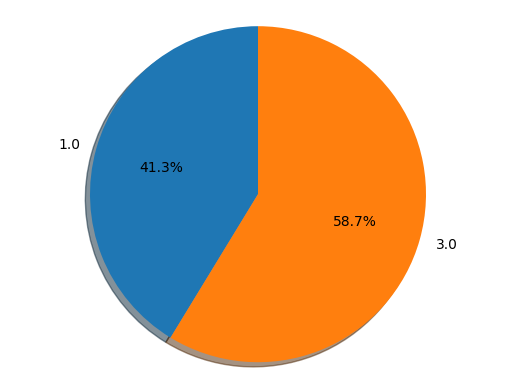

In [11]:
#agora, vou usar trabalho['percent'] para criar um gráfico de pizza

# Estamos criando a representação, área de plotagem
fig1, ax1 = plt.subplots()

# Criando o gráfico
ax1.pie(trabalho['percent'], labels=trabalho['Trabalho'], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Com esta opção, o gráfico ficará em círculo
ax1.axis('equal')

# Mostra o gráfico
plt.show()

Agora considerando as mulheres que trabalham, quero saber da cor ou raça e a renda. Depois farei o mesmo teste com as que não trabalham.

In [12]:
raca = fem.groupby(['V0404','V9001'])['V0302'].count().reset_index()
raca.rename(columns={'V0404' : 'Cor ou Raca','V9001' : 'Trabalho', 'V0302' : 'Total'}, inplace=True)
raca.sort_values(by=['Trabalho'], ascending=True)

,Cor ou Raca,Trabalho,Total
0,0,1.0,256
2,2,1.0,29770
4,4,1.0,6610
6,6,1.0,306
8,8,1.0,29190
1,0,3.0,426
3,2,3.0,38878
5,4,3.0,8658
7,6,3.0,363
9,8,3.0,45721


De acordo com o dicionário, temos o seguinte:  
  2	Branca  
  4	Preta  
  6	Amarela  
  8	Parda  
  0	Indígena  
  9	Sem declaração  
  
  Como podemos ver ali em cima, a maior parte das informações estão entre brancas e pardas. Em relação às empregadas, a diferença entre brancas e pardas é pequena. No entanto, em relação às desempregadas, o número de pardas é bem maior. Além disso, o número de mulheres brancas empregadas é maior. Já o número de pardas desempregadas é o maior.
